# Lab 8: Regression with Scikit-Learn

The objective of this notebook is to learn about the **Scikit-Learn** library (<a href="https://scikit-learn.org/stable/" >official documentation</a>) and **regression**.

In this lab, we will train a regression model that predicts the price of the house given some input features such as 'price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'.

## Outline

- [1. Load Dataset](#1)
- [2. Data Exploration](#2)
- [3. Linear Regression with 1D input features](#3)
- [4. Regression with all input features](#4)


First, run the following cell to import some useful libraries to complete this Lab. If not already done, you must install them in your virtual environment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import svm

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


<a id='1'></a>
## 1. Load dataset

Firstly, you will load the first dataset for this lab into a DataFrame `df`. The dataset is stored in the csv file from the following path `"data_lab8/Housing.csv"`. 

In [2]:
data_path = "data_lab8/Housing.csv"
df = pd.read_csv(data_path)

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
print(f"There are {len(df)} samples in the dataset.")

There are 545 samples in the dataset.


In [5]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

As you can see, the dataset is composed of many columns. Some are **numerical attributes** (i.e., `price`, `area`, `bedrooms`, `bathrooms`, `stories`, and `parking`). In contrast, other columns are categorical attributes (i.e., `mainroad`, `guestroom`, `basement`, `hotwaterheating`, `airconditioning`, `prefarea`, and `furnishingstatus`). Remember that Machine Learning algorithms works only with numerical features. Therefore, categorical feature must be encoded to numbers as a pre-prcessing step. We will learn more about pre-processing in the next lectures. For now, let's focus on numerical features.

### Exercise 1.1

Select the list of columns in `numerical_columns` from the DataFrame `df` and assign the selected subset DataFrame to the same variable `df`. 

In [11]:
numerical_columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

#### START CODE HERE ####
#### Approximately 1 line ####
df = df[numerical_columns]

#### END CODE HERE ####

In [12]:
df.head()

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


#### Expected output
```           price	area    bedrooms   bathrooms	 stories      parking```<br>
```0	13300000	7420	       4	   2	       3	    2```<br>
```1	12250000	8960	       4	   4	       4	    3```<br>
```2	12250000	9960	       3	   2	       2	    2```<br>
```3	12215000	7500	       4	   2	       2	    3```<br>
```4	11410000	7420	       4	   1	       2	    2```


<a id='2'></a>
## 2. Data Exploration


### Exercise 2.1
Let's start by exploring the **target column** `price`.  Compute the **mean**, the **standard deviation**, and the **variance** of the `price` column. Store the **mean**, the **standard deviation**, and the **variance** in the variables `price_mean`, `price_std`, and `price_var` respectively.

In [13]:
#### START CODE HERE ####
#### Approximately 2 line ####

price_mean = df["price"].mean()
price_std = df["price"].std()
price_var = df["price"].var()

#### END CODE HERE ####

In [14]:
print(f"Price mean: {price_mean:.2f}")
print(f"Price standard deviation: {price_std:.2f}")
print(f"Price variance: {price_var:.2f}")

Price mean: 4766729.25
Price standard deviation: 1870439.62
Price variance: 3498544355820.57


#### Expected output
```Price mean: 4766729.25```<br>
```Price standard deviation: 1870439.62```<br>
```Price variance: 3498544355820.57```

The next cell plots the distributions of the prices. Please run the following cell to show the plot.

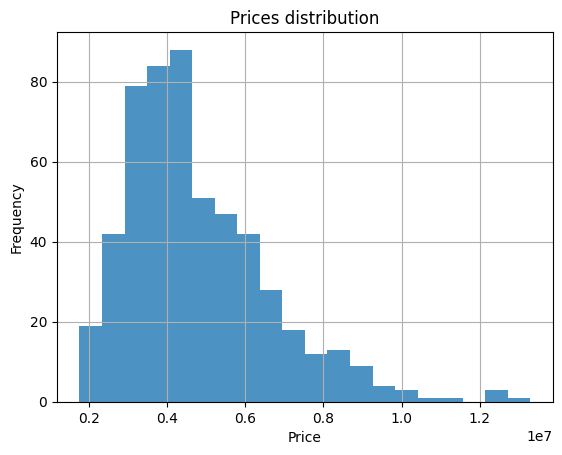

In [15]:
ax = df["price"].plot.hist(bins=20, alpha=0.8)
ax.set_xlabel("Price")
ax.set_title("Prices distribution")
ax.grid(True)
plt.show()

<a id='3'></a>
## 3. Linear Regression with 1D input features

Now you will implement a **Linear Regression** using a one-dimensional input feature (i.e., the *area* of the houses). Therefore, the task is to predict the *Price* of the houses given the *Area*.

Firstly, run the next cell to plot the points in the space.

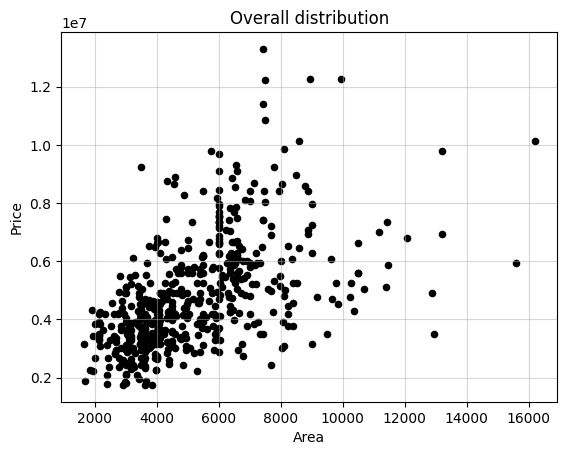

In [30]:
df.plot(x='area', y='price', kind='scatter', c='black')
plt.title("Overall distribution")
plt.xlabel("Area")
plt.ylabel("Price")
plt.grid(True, alpha=0.5)
plt.show()

You can see that some **noisy points** are present. **Noisy points** can affect the performance of your learning algorithms. Indeed, some points have a really big area far from the distribution of the other points. We will perform a simple pre-processing step to remove the points with *area* >= 12000.

Run the next cell to perform the pre-processing.

In [31]:
df_1d = df.loc[df.area < 12000]

In [32]:
print(len(df_1d))

538


Now, we will select only the *Area* as input feature `df_X_1d` and the *Price* as target variable `df_Y_1d`.

In [33]:
df_X_1d = df_1d[["area"]] 
df_Y_1d = df_1d[["price"]] 

As usual, we will split our data into training and test set.

In [34]:
X_train_1d, X_test_1d, y_train_1d, y_test_1d = train_test_split(df_X_1d, df_Y_1d, test_size=0.2, shuffle=True, random_state=42)

The following cell plots the distribution of the training points in the plane. Run the next cell to visualize the training points.

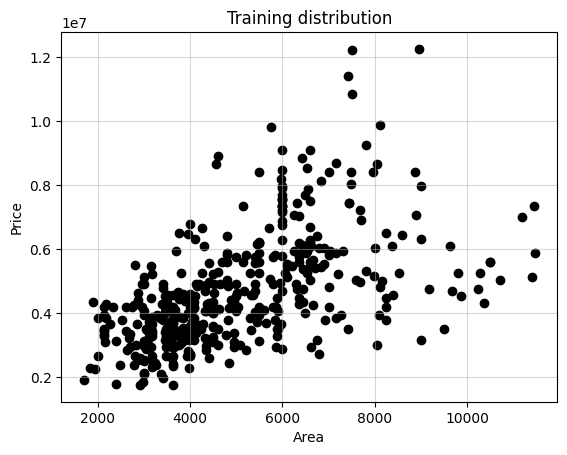

In [35]:
fig, ax = plt.subplots()
ax.scatter(x=X_train_1d, y=y_train_1d, c='black')

ax.set_title("Training distribution")
ax.set_xlabel("Area")
ax.set_ylabel("Price")
plt.grid(True, alpha=0.5)
plt.show()

The following cell plots the distribution of the test points in the plane. Run the next cell to visualize the test points.

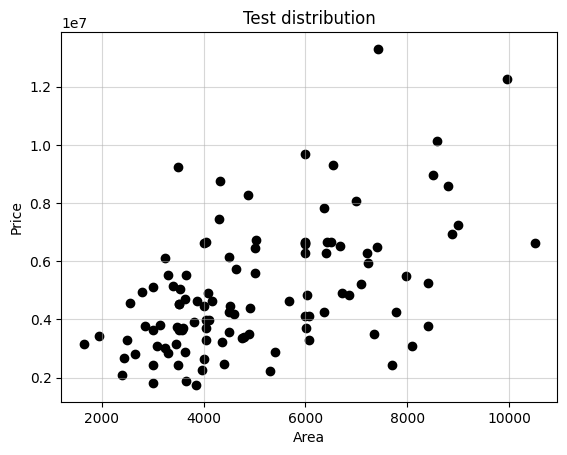

In [36]:
fig, ax = plt.subplots()
ax.scatter(x=X_test_1d, y=y_test_1d ,c='black')

ax.set_title("Test distribution")
ax.set_xlabel("Area")
ax.set_ylabel("Price")
plt.grid(True, alpha=0.5)
plt.show()

### Exercise 3.1

Create a `LinearRegression()` object and fit the linear regression on the training data. Replace `None` with your code.

In [43]:
#### START CODE HERE ####
#### Approximately 2 line ####


regr = linear_model.LinearRegression()
regr.fit(X_train_1d, y_train_1d)

#### END CODE HERE ####

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Exercise 3.2

Predict the prices of the houses for your **training data** in a variable `y_pred_train_1d`.

In [44]:
#### START CODE HERE ####
#### Approximately 1 line ####

y_pred_train_1d = regr.predict(X_train_1d)

#### END CODE HERE ####

The next cell visualize the learned straight line on your **training data**. Run the following cell to visualize the learned line.

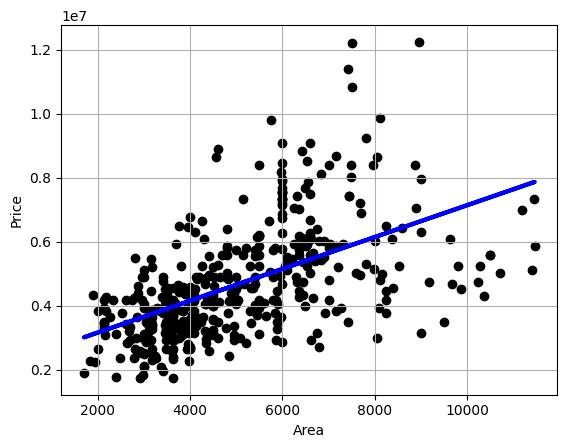

In [45]:
plt.scatter(X_train_1d, y_train_1d, color="black")
plt.plot(X_train_1d, y_pred_train_1d, color="blue", linewidth=3)

plt.xlabel("Area")
plt.ylabel("Price")
plt.xticks()
plt.yticks()

plt.grid(True)
plt.show()

### Exercise 3.3

Predict the prices of the houses for your **test data** in a variable `y_pred_test_1d`.

In [48]:
#### START CODE HERE ####
#### Approximately 1 line ####

y_pred_test_1d = regr.predict(X_test_1d)

#### END CODE HERE ####

The next cell visualize the learned straight line on your training data and the points of the **test data**. Run the following cell to visualize the learned line.

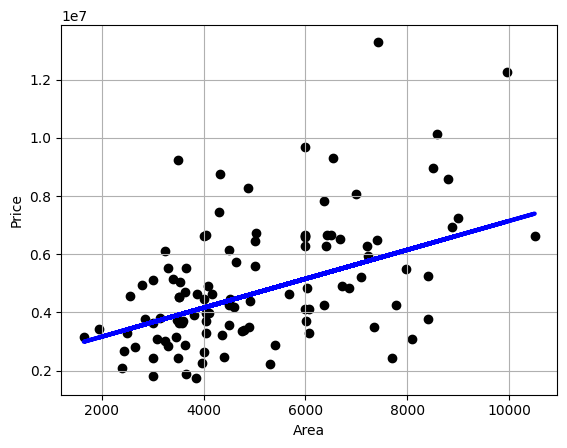

In [49]:
plt.scatter(X_test_1d, y_test_1d, color="black")
plt.plot(X_test_1d, y_pred_test_1d, color="blue", linewidth=3)

plt.xlabel("Area")
plt.ylabel("Price")
plt.xticks()
plt.yticks()

plt.grid(True)
plt.show()

### Exercise 3.4

Compute the **Mean Absolute Error**, the **Mean Squared Error** and the **R2** in the variables `mae_test`, `mse_test`, and `r2_test`, respectively. Replace `None` with your code.

You read more on such metrics in the official documentation:
- <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html" >mean_absolute_error</a>
- <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html" >mean_squared_error</a>
- <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html" >r2_score</a>

In [50]:
#### START CODE HERE ####
#### Approximately 3 line ####

mae_test = mean_absolute_error(y_test_1d, y_pred_test_1d)
mse_test = mean_squared_error(y_test_1d, y_pred_test_1d)
r2_test = r2_score(y_test_1d, y_pred_test_1d)

#### END CODE HERE ####

In [51]:
print(f"Mean of the prices: {price_mean}")
print(f"Std of the prices: {price_std}")
print(f"Variance of the prices: {price_var}")

print(f"\nMean Absolute Error on test data: {mae_test}")
print(f"Mean Squared Error on test data: {mse_test}")
print(f"R2 score on test data: {r2_test}")

Mean of the prices: 4766729.247706422
Std of the prices: 1870439.6156573922
Variance of the prices: 3498544355820.573

Mean Absolute Error on test data: 1407509.8013314893
Mean Squared Error on test data: 3575212178202.1855
R2 score on test data: 0.2467447918823492


The model does not seem to perform very well. Let's see if we can improve by using all the input features.

<a id='4'></a>
## 4. Regression with all input features

Now you will train and evaluate several regression models with **all the numerical input features**.

In [52]:
df.head()

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


Run the next cell to select all the numerical input features as input.

In [53]:
df_X = df.loc[:, "area":]
df_y = df[["price"]]

Run the next cell to split the data into training and test sets.

In [54]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, shuffle=True, random_state=42)


In [55]:
X_train.head()

,area,bedrooms,bathrooms,stories,parking
46,6000,3,2,4,1
93,7200,3,2,1,3
335,3816,2,1,1,2
412,2610,3,1,2,0
471,3750,3,1,2,0


In [56]:
X_test.head()

,area,bedrooms,bathrooms,stories,parking
316,5900,4,2,2,1
77,6500,3,2,3,0
360,4040,2,1,1,0
90,5000,3,1,2,0
493,3960,3,1,1,0


As you can see, the input features have very **different scales**. As discussed in previous labs, features with different scales differentially impact the calculation of validation metrics. We must therefore perform, separately for each column, the **normalization of the input features**.

However, this time we have both training and test set. When you have both training and test, you have to **calculate statistics for the normalization on the training** (i.e., with the `fit_transform()` method) and **use those statistics on the test set** (i.e., with the `transform()` method). This is because the model cannot learn on the test data. This data simulates data never seen by the model on which it will have to make predictions. Therefore, they cannot even be used to estimate some statistics about the data.

In this case, we want to perform **min-max normalization** of the dataset. To achieve this in scikit-learn is simple. There is a function in the pre-processing module to do this. However, as introduced before, the min and max are calculated only on the training and are used to normalize both the training and the test.

If this step is not clear to you, don't worry. We will see it in detail when we talk about data pre-processing.

Run the following cell to perform the Min-Max normalization.

In [57]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

X_train_processed = min_max_scaler.fit_transform(X_train)
X_train_processed = pd.DataFrame(X_train_processed, columns=X_train.columns)

X_test_processed = min_max_scaler.transform(X_test)
X_test_processed = pd.DataFrame(X_test_processed, columns=X_test.columns)


In [58]:
X_train_processed.head()

,area,bedrooms,bathrooms,stories,parking
0,0.298969,0.4,0.333333,1.000000,0.333333
1,0.381443,0.4,0.333333,0.000000,1.000000
2,0.148866,0.2,0.000000,0.000000,0.666667
3,0.065979,0.4,0.000000,0.333333,0.000000
4,0.144330,0.4,0.000000,0.333333,0.000000


In [59]:
X_test_processed.head()

,area,bedrooms,bathrooms,stories,parking
0,0.292096,0.6,0.333333,0.333333,0.333333
1,0.333333,0.4,0.333333,0.666667,0.000000
2,0.164261,0.2,0.000000,0.000000,0.000000
3,0.230241,0.4,0.000000,0.333333,0.000000
4,0.158763,0.4,0.000000,0.000000,0.000000


As you can see, after normalization, all features in the training set are in the range [0, 1].

### Exercise 4.1

Now you will train and evalaute several regression models on the preprocessed data. Note that you should use `X_train_processed` and `X_test_processed` as input of your models.


This exercise is open. So it's up to you to choose regression models from those available on scikit-learn, train and validate them.



In [69]:
from sklearn.model_selection import GridSearchCV, cross_val_score


param_grid = {
    'alpha': [0.1, 0.2, 0.3, 0.4, 0.5],
    'fit_intercept': [True, False]
}

reg1 = linear_model.Ridge()
gridSearch1 = GridSearchCV(reg1, param_grid, scoring='r2', cv=5)
gridSearch1.fit(X_train_processed, y_train)
best_ridge = gridSearch1.best_estimator_
y_pred_ridge = best_ridge.predict(X_test_processed)

print("Best Ridge:", gridSearch1.best_params_, "CV R²:", gridSearch1.best_score_)

reg2 = linear_model.Lasso()
gridSearch2 = GridSearchCV(reg2, param_grid, scoring='r2', cv=5)
gridSearch2.fit(X_train_processed, y_train)
best_lasso = gridSearch2.best_estimator_
y_pred_lasso = best_lasso.predict(X_test_processed)

print("Best Lasso:", gridSearch2.best_params_, "CV R²:", gridSearch2.best_score_)

r2_ridge = r2_score(y_test, y_pred_ridge)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Estimator Ridge R2: ", gridSearch1.best_estimator_, "R2 Score:", r2_ridge)
print("Estimator Lasso R2: ", gridSearch2.best_estimator_, "R2 Score:", r2_lasso)

r2_ridgeCV = cross_val_score(best_ridge, X_test_processed, y_test, cv=5, scoring='r2')
r2_lassoCV = cross_val_score(best_lasso, X_test_processed, y_test, cv=5, scoring='r2')

print("Estimator Ridge CV: ", gridSearch1.best_estimator_, "R2 Score:", r2_ridgeCV.mean())
print("Estimator Lasso CV: ", gridSearch2.best_estimator_, "R2 Score:", r2_lassoCV.mean())


Best Ridge: {'alpha': 0.5, 'fit_intercept': True} CV R²: 0.5283653245929412
Best Lasso: {'alpha': 0.5, 'fit_intercept': True} CV R²: 0.5267070452274656
Estimator Ridge R2:  Ridge(alpha=0.5) R2 Score: 0.5432586644505879
Estimator Lasso R2:  Lasso(alpha=0.5) R2 Score: 0.5464057813367715
Estimator Ridge CV:  Ridge(alpha=0.5) R2 Score: 0.4151788895218724
Estimator Lasso CV:  Lasso(alpha=0.5) R2 Score: 0.41353059192305075


Migliori iperparametri
Entrambi hanno scelto alpha = 0.5 e fit_intercept = True.
👉 significa che un po’ di regolarizzazione (alpha=0.5) migliora la stabilità del modello.

CV interna (GridSearchCV)

Ridge: 0.528

Lasso: 0.527
→ molto simili, segno che i dati non penalizzano né Ridge né Lasso.

Test set (R² diretto)

Ridge: 0.543

Lasso: 0.546
→ le performance si confermano anche fuori dal training. Bene!

CV esterna sul test (media su 5 fold del test set)

Ridge: 0.415

Lasso: 0.414
→ qui vedi un calo: la cross-validation su un set piccolo (test) genera più variabilità → per questo non è la pratica migliore.

📌 Cosa concludere

Ridge e Lasso sono equivalenti nel tuo caso → entrambi migliorano il modello con alpha=0.5.

L’R² intorno a 0.54 indica che il modello spiega circa il 54% della variabilità dei dati (buono ma non altissimo).

La differenza tra CV interna e CV sul test dipende dalla variabilità introdotta: di solito ci si ferma al r2_score sul test, senza rifare CV lì.